# GAME

In [1]:
import pandas as pd
Data = pd.read_excel('Game.xlsx', sheet_name=['Objective and Instructions', 'Game_data'])

In [2]:
Game = Data.get('Game_data')

In [38]:
Game.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,16,Luis García,37,https://cdn.sofifa.org/players/4/19/16.png,Spain,https://cdn.sofifa.org/flags/45.png,71,71,KAS Eupen,https://cdn.sofifa.org/teams/2/light/2013.png,...,79.0,70.0,43.0,40.0,9.0,12.0,13.0,11.0,11.0,€1.1M
1,41,Iniesta,34,https://cdn.sofifa.org/players/4/19/41.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,Vissel Kobe,https://cdn.sofifa.org/teams/2/light/101146.png,...,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,€26.9M
2,80,E. Belözoğlu,37,https://cdn.sofifa.org/players/4/19/80.png,Turkey,https://cdn.sofifa.org/flags/48.png,79,79,Medipol Başakşehir FK,https://cdn.sofifa.org/teams/2/light/101014.png,...,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0,€7.6M
3,164,G. Pinzi,37,https://cdn.sofifa.org/players/4/19/164.png,Italy,https://cdn.sofifa.org/flags/27.png,70,70,Padova,https://cdn.sofifa.org/teams/2/light/110912.png,...,68.0,74.0,71.0,66.0,5.0,15.0,7.0,6.0,13.0,€372K
4,657,D. Vaughan,35,https://cdn.sofifa.org/players/4/19/657.png,Wales,https://cdn.sofifa.org/flags/50.png,66,66,Notts County,https://cdn.sofifa.org/teams/2/light/1937.png,...,82.0,59.0,66.0,62.0,6.0,9.0,10.0,9.0,7.0,€263K


In [81]:
Game = Game.fillna(0)

In [82]:
Game.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

## 1	Outliers for Wages

In [83]:
import seaborn as sns
# Create new variable G to avoid changes Game['Wage']
G = Game['Wage']

### Repalce Currency with empty space
### Replace K with 1000
### Fill NaN float values with 0
### Convert float Data to int Data

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wage'>

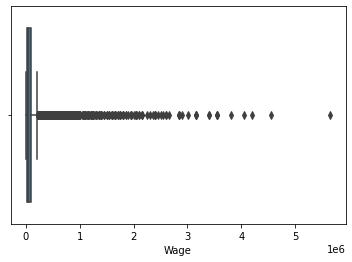

In [84]:
G = G.str.replace('€', '')
G = G.str.replace('K', '1000')
G = G.fillna(0)
G = G.astype(int)
sns.boxplot(G)

## 2 Analyze the distribution for potential column

<AxesSubplot:ylabel='Density'>

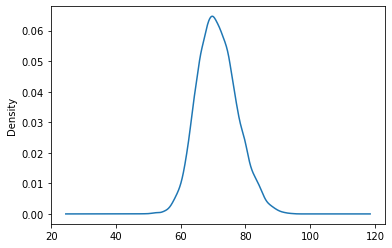

In [7]:
Game['Potential'].plot(kind='kde')

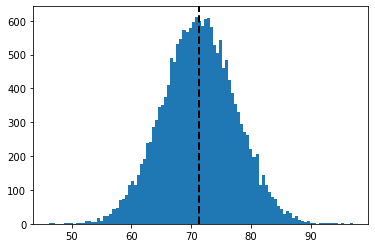

In [16]:
import numpy as np
import matplotlib.pyplot as plt
  
# Mean of the distribution
Mean = np.mean(Game['Potential'])
 
# satndard deviation of the distribution
Standard_deviation  =  np.std(Game['Potential'])
  
# size
size = len(Game['Potential'])
  
# creating a normal distribution data
values = np.random.normal(Mean, Standard_deviation, size)
  
# plotting histograph
plt.hist(values, 100)
# plotting mean line
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=2)
plt.show()

## 3 Difference between normal and student t distribution explain it using 'potential' column.

### Student t Distribution

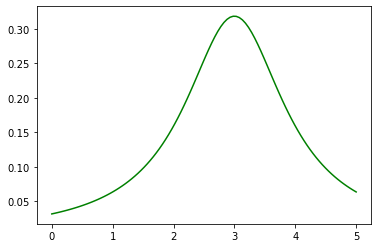

In [37]:
import matplotlib.pyplot as plt
from scipy.stats import t
 
x = np.linspace(0, 5, 100)
 
# Varying positional arguments
y1 = t.pdf(x, 1, 3)
plt.plot(x, y1, color='green')
plt.show()

In [66]:
df = len(Game['Potential']) - 1
mean, var, skew, kurt = t.stats(df, moments='mvsk')

- T distributions have higher kurtosis than normal distributions

In [60]:
kurt > mean

True

- The probability of getting values very far from the mean is larger with a T distribution than a normal distribution.

In [70]:
x = np.linspace(0, 5, 100)
t.ppf(x, df),

(array([       -inf, -1.64005936, -1.27586308, -1.02998591, -0.83444644,
        -0.66657748, -0.51571376, -0.375799  , -0.24290619, -0.11418688,
         0.01266025,  0.13971225,  0.2690701 ,  0.40311456,  0.54485694,
         0.69853998,  0.87086677,  1.07401926,  1.33522876,  1.7461136 ,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,     

### Normal Distribution

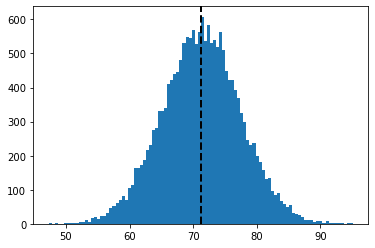

In [64]:
import numpy as np
import matplotlib.pyplot as plt
  
# Mean of the distribution
Mean = np.mean(Game['Potential'])
 
# satndard deviation of the distribution
Standard_deviation  =  np.std(Game['Potential'])
  
# size
size = len(Game['Potential'])
  
# creating a normal distribution data
values = np.random.normal(Mean, Standard_deviation, size)
  
# plotting histograph
plt.hist(values, 100)
# plotting mean line
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=2)
plt.show()

- Symmetrical
- Bell-shaped
- Mean and median are equal; both located at the center of the distribution

## 4 Difference between normal and standard normal distribution explain it using 'potential' column.

### Standard Normal Distribution

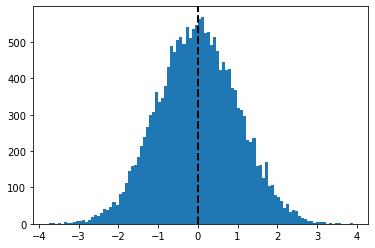

In [55]:
import numpy as np
import matplotlib.pyplot as plt
  
# size
size = len(Game['Potential'])
  
# creating a normal distribution data
values = np.random.standard_normal(size)
  
# plotting histograph
plt.hist(values, 100)
# plotting mean line
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=2)
plt.show()

- Mean is equal to 0 and 
- Standard deviation is equal to 1.

### Normal Distribution

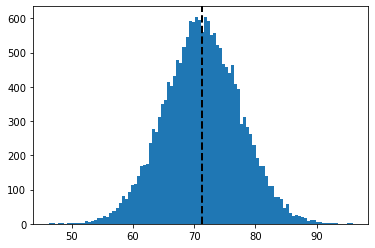

In [49]:
import numpy as np
import matplotlib.pyplot as plt
  
# Mean of the distribution
Mean = np.mean(Game['Potential'])
 
# standard deviation of the distribution
Standard_deviation  =  np.std(Game['Potential'])
  
# size
size = len(Game['Potential'])
  
# creating a normal distribution data
values = np.random.normal(Mean, Standard_deviation, size)
  
# plotting histograph
plt.hist(values, 100)
# plotting mean line
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=2)
plt.show()

- Symmetrical
- Bell-shaped
- Mean and median are equal; both located at the center of the distribution

In [52]:
Mean, np.median(Game['Potential'])

(71.30729939034437, 71.0)

## 5 find the 95%, 90%, and 99%, confidence interval for 'Potential','wage','weight' column.

In [76]:
# Sample size
n = len(Game['Potential'])
# Confidence level
C = 0.95  # 95%
# Significance level, α
alpha = 1 - C
# Number of tails
tails = 2
# Quantile (the cumulative probability)
q = 1 - (alpha / tails)
# Degrees of freedom
dof = n - 1
# Critical t-statistic, calculated using the percent-point function (aka the
# quantile function) of the t-distribution

t_star = t.ppf(q, dof)
# Confidence interval
x_bar = np.mean(Game['Potential'])
s = np.std(Game['Potential'])
ci_upper = x_bar + t_star * s / np.sqrt(n)
ci_lower = x_bar - t_star * s / np.sqrt(n)

print(f'We are 95% sure that the true mean lies between {ci_lower:4.1f} and {ci_upper:5.1f}')

We are 95% sure that the true mean lies between 71.2 and  71.4


In [86]:
# Sample size
n = len(Game['Wage'])
# Confidence level
C = 0.95  # 95%
# Significance level, α
alpha = 1 - C
# Number of tails
tails = 2
# Quantile (the cumulative probability)
q = 1 - (alpha / tails)
# Degrees of freedom
dof = n - 1
# Critical t-statistic, calculated using the percent-point function (aka the
# quantile function) of the t-distribution

t_star = t.ppf(q, dof)
# Confidence interval
x_bar = np.mean(G)
s = np.std(G)
ci_upper = x_bar + t_star * s / np.sqrt(n)
ci_lower = x_bar - t_star * s / np.sqrt(n)

print(f'We are 95% sure that the true mean lies between {ci_lower:4.1f} and {ci_upper:5.1f}')

We are 95% sure that the true mean lies between 95104.2 and 101495.6


In [90]:
W = Game['Weight']

In [91]:
W = W.str.replace('lbs', '')
W = W.fillna(0)
W = W.astype(int)

In [92]:
# Sample size
n = len(W)
# Confidence level
C = 0.95  # 95%
# Significance level, α
alpha = 1 - C
# Number of tails
tails = 2
# Quantile (the cumulative probability)
q = 1 - (alpha / tails)
# Degrees of freedom
dof = n - 1
# Critical t-statistic, calculated using the percent-point function (aka the
# quantile function) of the t-distribution

t_star = t.ppf(q, dof)
# Confidence interval
x_bar = np.mean(W)
s = np.std(W)
ci_upper = x_bar + t_star * s / np.sqrt(n)
ci_lower = x_bar - t_star * s / np.sqrt(n)

print(f'We are 95% sure that the true mean lies between {ci_lower:4.1f} and {ci_upper:5.1f}')

We are 95% sure that the true mean lies between 165.3 and 165.8


### C = 90

In [96]:
# Sample size
n = len(Game['Potential'])
# Confidence level
C = 0.90  # 90%
# Significance level, α
alpha = 1 - C
# Number of tails
tails = 2
# Quantile (the cumulative probability)
q = 1 - (alpha / tails)
# Degrees of freedom
dof = n - 1
# Critical t-statistic, calculated using the percent-point function (aka the
# quantile function) of the t-distribution

t_star = t.ppf(q, dof)
# Confidence interval
x_bar = np.mean(Game['Potential'])
s = np.std(Game['Potential'])
ci_upper = x_bar + t_star * s / np.sqrt(n)
ci_lower = x_bar - t_star * s / np.sqrt(n)

print(f'We are 90% sure that the true mean lies between {ci_lower:4.1f} and {ci_upper:5.1f}')

We are 90% sure that the true mean lies between 71.2 and  71.4


In [95]:
# Sample size
n = len(G)
# Confidence level
C = 0.90  # 90%
# Significance level, α
alpha = 1 - C
# Number of tails
tails = 2
# Quantile (the cumulative probability)
q = 1 - (alpha / tails)
# Degrees of freedom
dof = n - 1
# Critical t-statistic, calculated using the percent-point function (aka the
# quantile function) of the t-distribution

t_star = t.ppf(q, dof)
# Confidence interval
x_bar = np.mean(G)
s = np.std(G)
ci_upper = x_bar + t_star * s / np.sqrt(n)
ci_lower = x_bar - t_star * s / np.sqrt(n)

print(f'We are 90% sure that the true mean lies between {ci_lower:4.1f} and {ci_upper:5.1f}')

We are 90% sure that the true mean lies between 95618.0 and 100981.8


In [97]:
# Sample size
n = len(W)
# Confidence level
C = 0.90  # 90%
# Significance level, α
alpha = 1 - C
# Number of tails
tails = 2
# Quantile (the cumulative probability)
q = 1 - (alpha / tails)
# Degrees of freedom
dof = n - 1
# Critical t-statistic, calculated using the percent-point function (aka the
# quantile function) of the t-distribution

t_star = t.ppf(q, dof)
# Confidence interval
x_bar = np.mean(W)
s = np.std(W)
ci_upper = x_bar + t_star * s / np.sqrt(n)
ci_lower = x_bar - t_star * s / np.sqrt(n)

print(f'We are 90% sure that the true mean lies between {ci_lower:4.1f} and {ci_upper:5.1f}')

We are 90% sure that the true mean lies between 165.3 and 165.8


### C = 99

In [100]:
# Sample size
n = len(Game['Potential'])
# Confidence level
C = 0.99  # 99%
# Significance level, α
alpha = 1 - C
# Number of tails
tails = 2
# Quantile (the cumulative probability)
q = 1 - (alpha / tails)
# Degrees of freedom
dof = n - 1
# Critical t-statistic, calculated using the percent-point function (aka the
# quantile function) of the t-distribution

t_star = t.ppf(q, dof)
# Confidence interval
x_bar = np.mean(Game['Potential'])
s = np.std(Game['Potential'])
ci_upper = x_bar + t_star * s / np.sqrt(n)
ci_lower = x_bar - t_star * s / np.sqrt(n)

print(f'We are 99% sure that the true mean lies between {ci_lower:4.1f} and {ci_upper:5.1f}')

We are 99% sure that the true mean lies between 71.2 and  71.4


In [99]:
# Sample size
n = len(G)
# Confidence level
C = 0.99  # 99%
# Significance level, α
alpha = 1 - C
# Number of tails
tails = 2
# Quantile (the cumulative probability)
q = 1 - (alpha / tails)
# Degrees of freedom
dof = n - 1
# Critical t-statistic, calculated using the percent-point function (aka the
# quantile function) of the t-distribution

t_star = t.ppf(q, dof)
# Confidence interval
x_bar = np.mean(G)
s = np.std(G)
ci_upper = x_bar + t_star * s / np.sqrt(n)
ci_lower = x_bar - t_star * s / np.sqrt(n)

print(f'We are 99% sure that the true mean lies between {ci_lower:4.1f} and {ci_upper:5.1f}')

We are 99% sure that the true mean lies between 94099.9 and 102499.9


In [98]:
# Sample size
n = len(W)
# Confidence level
C = 0.99  # 99%
# Significance level, α
alpha = 1 - C
# Number of tails
tails = 2
# Quantile (the cumulative probability)
q = 1 - (alpha / tails)
# Degrees of freedom
dof = n - 1
# Critical t-statistic, calculated using the percent-point function (aka the
# quantile function) of the t-distribution

t_star = t.ppf(q, dof)
# Confidence interval
x_bar = np.mean(W)
s = np.std(W)
ci_upper = x_bar + t_star * s / np.sqrt(n)
ci_lower = x_bar - t_star * s / np.sqrt(n)

print(f'We are 99% sure that the true mean lies between {ci_lower:4.1f} and {ci_upper:5.1f}')

We are 99% sure that the true mean lies between 165.2 and 165.9


## 7 Proove Central Limit Theorom by using 'potential' column of the game_data.

The central limit theoram states that if we take large number of samples from any population with finite mean and variance then the distribution of the sample means will follow the normal distribution regradless of the type of the original distribution. Also the mean of these sample means will be equal to the population mean and standard error(standard deviation of the sample means) will decrease with increase in sample size.

In [102]:
import numpy.random as np
import seaborn as sns
import matplotlib.pyplot as plt
population_size = len(Game['Potential'])
population = np.rand(population_size)

In [103]:
number_of_samples = 10000
sample_means = np.rand(number_of_samples)
sample_size = 1

In [104]:
c = np.rand(number_of_samples)
for i in range(0,number_of_samples):
    c = np.randint(1,population_size,sample_size)
    sample_means[i] = population[c].mean()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


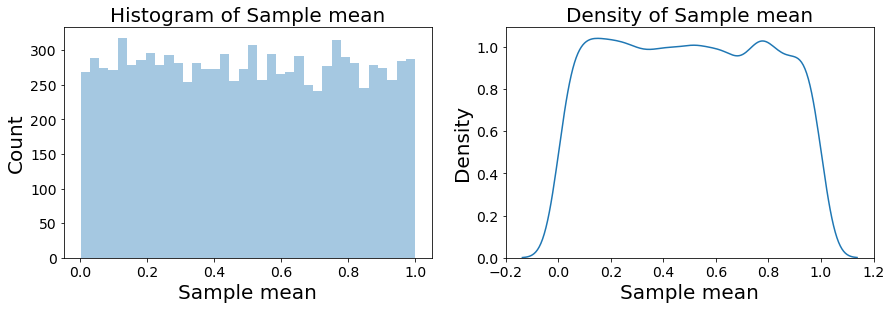

In [107]:
plt.subplot(1,2,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.distplot(sample_means,bins=int(180/5),hist = True,kde = False)
plt.title('Histogram of Sample mean',fontsize=20)
plt.xlabel('Sample mean',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(1,2,2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.distplot(sample_means,hist = False,kde = True)
plt.title('Density of Sample mean',fontsize=20)
plt.xlabel('Sample mean',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)

In [109]:
def sample_size_func(n): 
    sample_size = n
    c = np.rand(number_of_samples)
    for i in range(0,number_of_samples):
        c = np.randint(1,population_size,sample_size)
        sample_means[i] = population[c].mean()
    plt.subplot(1,2,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    sns.distplot(sample_means,bins=int(180/5),hist = True,kde = False)
    plt.title('Histogram of Sample mean',fontsize=20)
    plt.xlabel('Sample mean',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plt.subplot(1,2,2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    sns.distplot(sample_means,hist = False,kde = True)
    plt.title('Density of Sample mean',fontsize=20)
    plt.xlabel('Sample mean',fontsize=20)
    plt.ylabel('Density',fontsize=20)
    plt.subplots_adjust(bottom=0.1, right=2, top=0.9)

In [ ]:
### sample size = 2

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


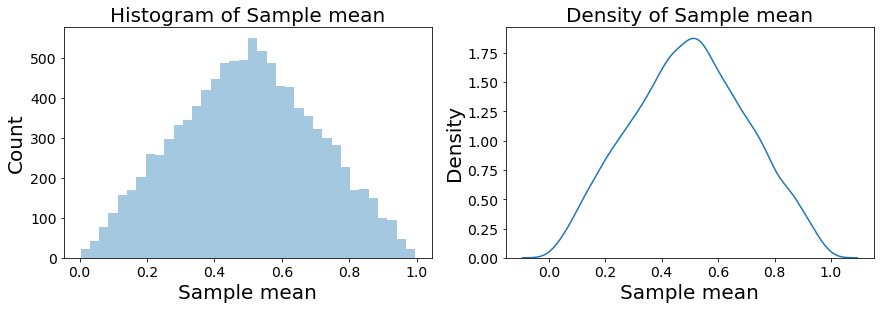

In [110]:
sample_size_func(2)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


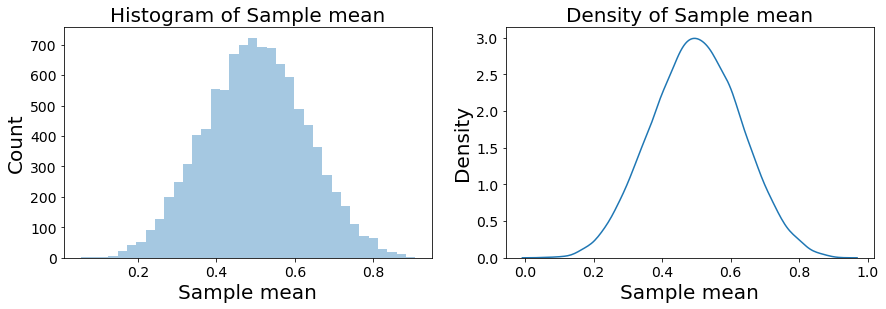

In [111]:
sample_size_func(5)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


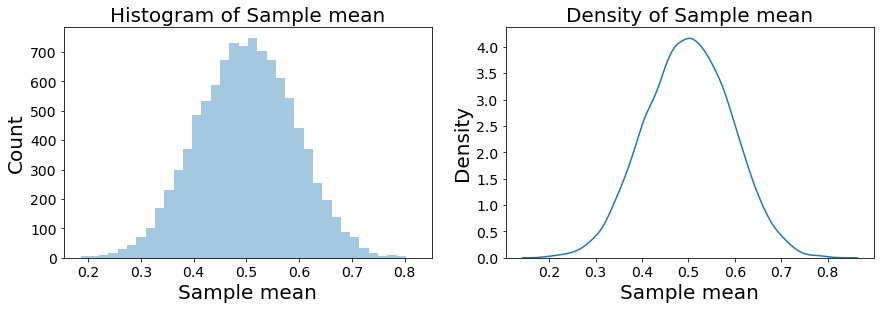

In [112]:
sample_size_func(10)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


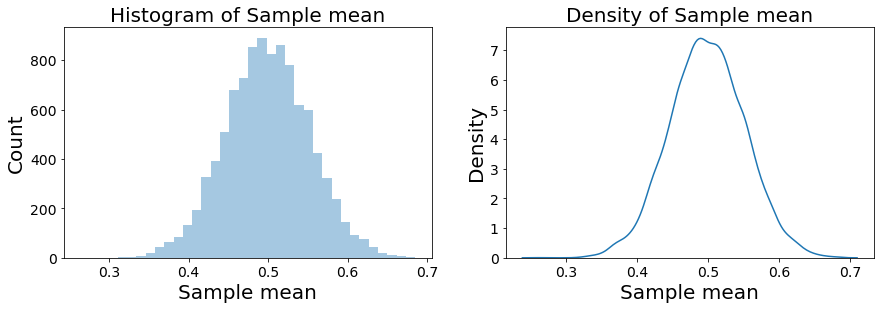

In [113]:
sample_size_func(30)

We can see that the distribution approaches normal as sample size gets larger. In theory the distribution is perfectly normal only when the sample size tends to infinity. But practically we can assume the distribution is normal when sample size is greater than or equal to 30.

# Thank You